# SBER

**Банки / [Сбербанк](https://www.sberbank.com/ru/investor-relations/reports-and-publications/ifrs) (SBER)**

Основан в 18XX году

## Менеджмент

...

In [1]:
company = 'SBER'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
dt = pd.read_excel('../tables/sber.xlsx', index_col='Год').T
dt = dt.reset_index().sort_index(ascending=False).rename({'index': 'year'}, axis=1).reset_index().dropna()
n_years = len(dt.index)

In [4]:
dt.head()

Год,index,year,Операционные доходы,Прибыль до налогообложения,Налог на прибыль,Чистая прибыль,Активы,Капитал,Обязательства,"Налог на прибыль, %",Capex,Количество акций,Цена акции,Капитализация,P/E,P/BV,ROA,ROE,Дивиденды на акцию
1,6,2014,9.393000e+11,3.742000e+11,8.390000e+10,2.146000e+11,2.520080e+13,2.020100e+12,2.318070e+13,0.224212,1.270000e+11,2.150000e+10,60.24,1.295160e+12,6.035228,0.641137,0.008516,0.106232,3.20
2,5,2015,9.546000e+11,3.312000e+11,1.083000e+11,3.658000e+11,2.733470e+13,2.375000e+12,2.495970e+13,0.326993,7.430000e+10,2.150000e+10,101.30,2.177950e+12,5.953937,0.917032,0.013926,0.154021,0.45
3,4,2016,1.355100e+12,6.775000e+11,1.356000e+11,4.924000e+11,2.536850e+13,2.821600e+12,2.254690e+13,0.200148,1.121000e+11,2.150000e+10,173.30,3.725950e+12,7.566917,1.320510,0.018686,0.174511,1.97
4,3,2017,1.616000e+12,9.432000e+11,1.945000e+11,7.505000e+11,2.711220e+13,3.436000e+12,2.367620e+13,0.206213,1.163000e+11,2.150000e+10,225.00,4.837500e+12,6.445703,1.407887,0.028601,0.218423,6.00
5,2,2018,1.703800e+12,1.046200e+12,2.150000e+11,8.317000e+11,3.119750e+13,3.855800e+12,2.734170e+13,0.205506,1.779000e+11,2.150000e+10,186.30,4.005450e+12,4.815979,1.038812,0.028527,0.215701,12.00


## Динамика выручки, капитала, обязательств, активов

In [45]:
dt.columns

Index(['index', 'year', 'Операционная прибыль', 'Прибыль до налогообложения',
       'Налог на прибыль', 'Чистая прибыль', 'Активы', 'Капитал',
       'Обязательства', 'Налог на прибыль, %', 'Capex', 'Количество акций',
       'Цена акции', 'Капитализация', 'P/E', 'P/BV', 'ROA', 'ROE',
       'Дивиденды на акцию'],
      dtype='object', name='Год')

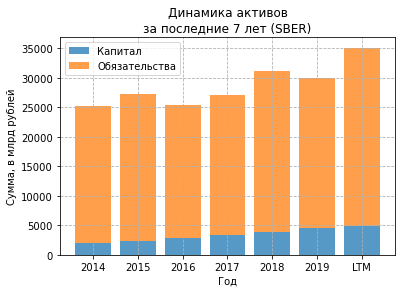

In [5]:
# plt.plot(dt.index, dt['Операционная прибыль']*1e-9, marker='o', ms=10, 
#          label='Операционная прибыль', c='darkgreen', ls=':')
plt.bar(dt.index, dt['Капитал']*1e-9, label='Капитал', alpha=0.75)
plt.bar(dt.index, dt['Обязательства']*1e-9, bottom=dt['Капитал']*1e-9, label='Обязательства', alpha=0.75)
plt.xticks(dt.index, dt.year)
plt.legend()
plt.title(f'Динамика активов\nза последние {n_years} лет ({company})')
plt.xlabel('Год')
plt.ylabel('Сумма, в млрд рублей')
plt.grid(ls='--')
plt.savefig('../images/assets.png', dpi=200)

In [7]:
9393/30275

0.3102559867877787

In [13]:
creditStr = \
pd.Series([12340.2, 2252.6, 4862.6, 2961.8, 845.7, 150], 
          index=['Коммерческое кредит. (юр.)', 'Проектное финанс. (юр.)', 'Жильё (физ.)', 'Потреб. (физ.)', 'Кредитные карты', 'Авто (физ.)'])

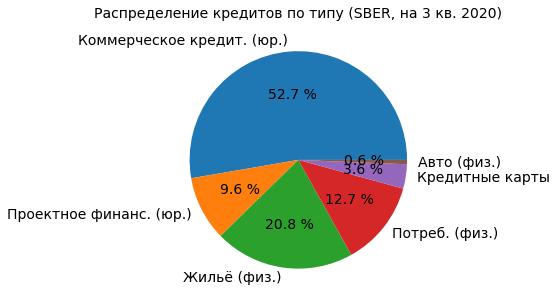

In [17]:
creditStr.plot(kind='pie', subplots=False, figsize=(7, 5), autopct='%.1f %%', fontsize=14)
plt.title(f"Распределение кредитов по типу ({company}, на 3 кв. 2020)", fontsize=14)
plt.ylabel("");
plt.savefig('../images/credit_kind.png', dpi=200)

In [5]:
creditSum = pd.Series([17361.3, 18488.1, 19585, 20796.7, 23412.8],
                     index=['2016', '2017', '2018', '2019', '2020 3кв'])

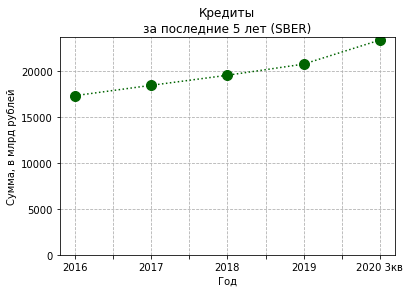

In [11]:
name = "Кредиты"
creditSum.plot(marker='o', ms=10, c='darkgreen', ls=':')

plt.title(f'{name}\nза последние 5 лет ({company})')
plt.xlabel('Год')
plt.ylabel('Сумма, в млрд рублей')
plt.grid(ls='--')
plt.ylim(0, None);
# plt.savefig('../images/credit_dyn.png', dpi=200)

Выручка растёт, активы растут, что хорошо. Доля обязательств в активах растёт, значит компания развивается за счёт заёмных средств.

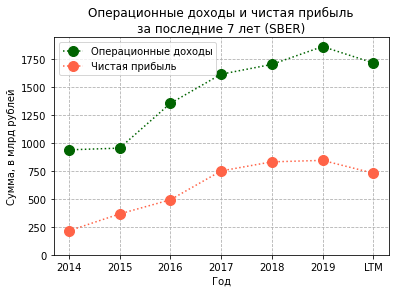

In [6]:
name = "Операционные доходы и чистая прибыль"
plt.plot(dt.index, dt['Операционные доходы']*1e-9, marker='o', ms=10, 
         label='Операционные доходы', c='darkgreen', ls=':')
plt.plot(dt.index, dt['Чистая прибыль']*1e-9, marker='o', ms=10, label='Чистая прибыль', c='tomato', ls=':')
# plt.bar(dt.index, dt['Чистая прибыль']*1e-9, label='Чистая прибыль', alpha=0.75)
plt.xticks(dt.index, dt.year)
plt.legend()
plt.ylim(0, None)
plt.title(f'{name}\nза последние {n_years} лет ({company})')
plt.xlabel('Год')
plt.ylabel('Сумма, в млрд рублей')
plt.grid(ls='--')
plt.savefig('../images/net_profit.png', dpi=200)

Здорово, что прибыль есть

Теперь посмотрю на динамику свободного денежного потока (FCF) - более продвинутого показателя, который и сложнее подделать

Денежный поток генерируется довольно стабильно

Высокий показатель Выручки к Себестоимости (что-то вроде добавленной стоимости). В последние годы даже немного подрос

...


## Коэффициент текущей ликвидности

показывает, как компания может погашать текущие обязательства за счет только оборотных активов.
Чем выше коэффициент, тем выше платежеспособность предприятия. Если этот показатель ниже 1,5, значит, предприятие не в состоянии вовремя оплачивать все счета.

Чуть выпали в 2019 году из зелёной зоны, но в целом ситуация хорошая

Теперь посмотрю детальнее на выручку

In [39]:
# sales_structure = \
# pd.Series([13.174e9, 1.672e9], index=['Россия', 'Прочее'])

In [40]:
# sales_structure.plot(kind='pie', subplots=True, figsize=(7, 5), autopct='%.2f', fontsize=14)
# plt.title(f"Распределение выручки\nпо регионам ({company}, 2019), в процентах", fontsize=14)
# plt.ylabel("");
# plt.savefig('../images/revenue_export.png', dpi=200)

In [3]:
# sales_structure2 = \
# pd.Series([29.997, 20.611, 6.833], 
#           index=['Капролактам и\nпродукты переработки','Аммиак и азотные\nудобрения', 'Прочее'])

In [4]:
# sales_structure2.plot(kind='pie', subplots=False, figsize=(7, 5), autopct='%.2f', fontsize=14)
# plt.title(f"Распределение выручки по типу\nпродукции ({company}, 2019), в процентах", fontsize=14)
# plt.ylabel("");
# # plt.savefig('../images/revenue_kind.png', dpi=200)

...

## Конкуренты

## Риски

1. *Валютный риск* 
    (Укрепление доллара уменьшает прибыль)
    
1. *Кредитный риск*
    (Риск возникновения дебиторской задолженности, поэтому компания выбирает надёжных клиентов)
    
1. *Риск ликвидности*
    (Компания пытается снижать количество краткосрочных кредитов и поддерживать текущий уровень ликвидности)
    
* Компания участвует в судебных разбирательствах (не оказывают существенного влияния)
* Компания частично застрахована, но не застрахована от простоев
* Компания опасается за правильный подсчёт налогов

## Дивидендная политика

[Дивиденды](https://www.dohod.ru/ik/analytics/dividend/belu)

In [18]:
# name = "Доля чистой прибыли, направленной\nна дивиденды"
# dt['dividend'] = dt['dividend_per_share']*dt['n_shares']
# plt.plot( dt.index, 100*dt['dividend']/dt['net_profit'], marker='o', ms=10, label='Дивиденды/акция' )
# plt.xticks(dt.index, dt.index.astype('str'))
# # plt.legend()
# plt.title(f'{name} за последние {n_years} лет ({company})')
# plt.ylim(0, None)
# plt.xlabel('Год')
# plt.ylabel('Доля, в процентах')
# plt.grid(ls='--')
# plt.savefig('../images/dividend_net_profit.png', dpi=200)

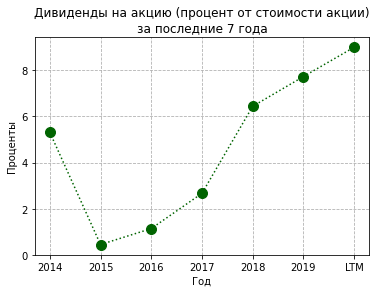

In [55]:
name = "Дивиденды на акцию (процент от стоимости акции)"
data = 100*dt['Дивиденды на акцию']/dt['Цена акции']
plt.xticks(dt.index, dt.year)
plt.plot( dt.index, data, marker='o', ms=10, ls=':', c='darkgreen' )
# plt.legend()
plt.title(f'{name}\nза последние {len(data.dropna())} года')#{n_years} лет ({company})')
plt.ylim(0, None)
plt.xlabel('Год')
plt.ylabel('Проценты')
plt.grid(ls='--')
plt.savefig('../images/dividend_share_percent.png', dpi=200)

## ROA

Отвечает на вопрос, выгоднее ли "владельцу" всё продать и положить деньги на депозит?

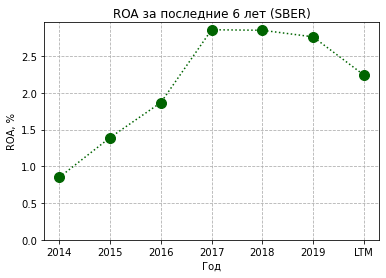

In [56]:
name = "ROA"
plt.xticks(dt.index, dt.index.astype('str'))
plt.plot( dt.index, 100*dt['ROA'], marker='o', ms=10, label=name, c='darkgreen', ls=':')
plt.xticks(dt.index, dt.year)
# plt.legend()
plt.ylim(0, None)
plt.title(f'{name} за последние {n_years-1} лет ({company})')
plt.xlabel('Год')
plt.ylabel('ROA, %')
plt.grid(ls='--')
plt.savefig('../images/ROA.png', dpi=200)

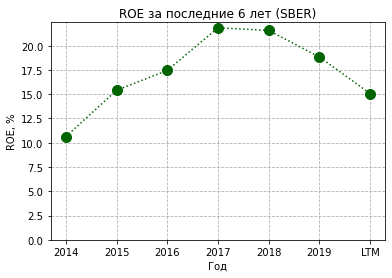

In [58]:
name = "ROE"
plt.xticks(dt.index, dt.index.astype('str'))
plt.plot( dt.index, 100*dt[name], marker='o', ms=10, label=name, c='darkgreen', ls=':')
plt.xticks(dt.index, dt.year)
# plt.legend()
plt.ylim(0, None)
plt.title(f'{name} за последние {n_years-1} лет ({company})')
plt.xlabel('Год')
plt.ylabel(f'{name}, %')
plt.grid(ls='--')
plt.savefig(f'../images/{name}.png', dpi=200)

В последние годы всё стало слишком хорошо

## Оценка компании

Теперь, пользуясь мультипликаторами, можно попробовать проверить, недооценена или переоценена компания на бирже

### Капитализация

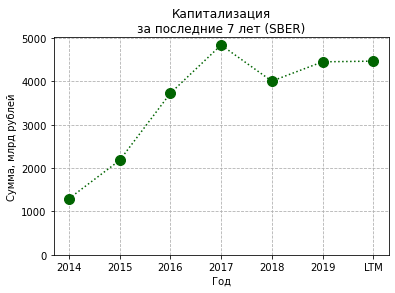

In [60]:
name = "Капитализация"
data = dt['Капитализация']*1e-9
plt.xticks(dt.index, dt.year)
plt.plot( dt.index, data, marker='o', ms=10, label='Капитализация', c='darkgreen', ls=':')
# plt.legend()
plt.ylim(0, None)
plt.title(f'{name}\nза последние {len(data.dropna())} лет ({company})')
plt.xlabel('Год')
plt.ylabel('Сумма, млрд рублей')
plt.grid(ls='--')
plt.savefig('../images/capitalization.png', dpi=200)

...

### P/E
Через сколько лет окупится инвестиция, если прибыль останется на том же уровне и всю прибыль руководство направит на дивиденды

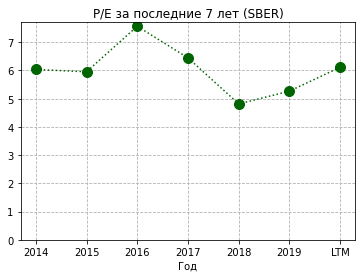

In [62]:
name = "P/E"
data = dt['P/E']
plt.xticks(dt.index, dt.year)
plt.plot( dt.index, data, marker='o', ms=10, label=name, ls=':', c='darkgreen' )
# plt.legend()
plt.title(f'{name} за последние {len(data.dropna())} лет ({company})')
plt.xlabel('Год')
# plt.ylabel('')
plt.ylim(0, None)
plt.grid(ls='--')
plt.savefig('../images/PE.png', dpi=200)

В последние годы P/E держится на довольно низком уровне, что хорошо

### P/BV

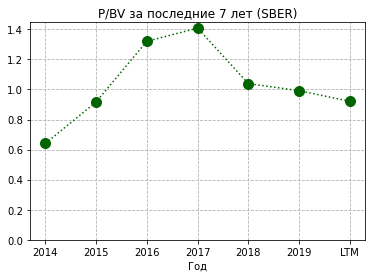

In [5]:
name = "P/BV"
data = dt['P/BV']
plt.xticks(dt.index, dt.year)
plt.plot( dt.index, data, marker='o', ms=10, label=name, ls=':', c='darkgreen' )
# plt.legend()
plt.title(f'{name} за последние {len(data.dropna())} лет ({company})')
plt.xlabel('Год')
# plt.ylabel('')
plt.ylim(0, None)
plt.grid(ls='--')
plt.savefig('../images/PBV.png', dpi=200)

In [33]:
cdf = pd.DataFrame([['Тинькофф', 10.0, 3.71], 
                    ['Сбер', 6.14, 0.98], 
                    ['ВТБ', 5.66, 0.55],
                    ['Банк Спб', 2.62, 0.25]], columns=['name', 'P/E', 'P/BV'])

In [48]:
colors = [plt.cm.tab10(i/float(len(cdf))) for i in range(len(cdf))]

In [49]:
colors

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745, 1.0)]

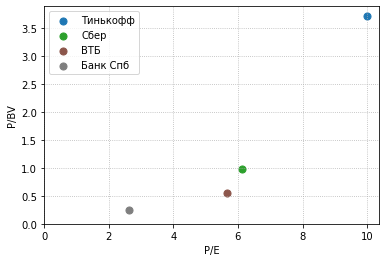

In [52]:
for i in range(len(cdf)):
    plt.scatter('P/E', 'P/BV', 
                data=cdf.loc[i], s=50, c=np.array([colors[i]]), label=cdf.loc[i, 'name'])
plt.grid(ls=':')
plt.xlabel('P/E');
plt.ylabel('P/BV')
plt.xlim(0, None)
plt.ylim(0, None)
plt.legend()
plt.savefig('../images/PS_PBV.png', dpi=200)

## Планы

## Вывод

Интересная компания с приличными показателями, может выиграть от коронавируса, есть над чем подумать